# Model Comparison
This notebook compares the performance of all trained models (ARIMA, SARIMAX, GARCH, LSTM) based on their RMSE and MAE metrics on the test set.

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Define model paths
model_dirs = [
    'arima-baseline',
    'sarimax-exogenous',
    'arima-garch-hybrid',
    'lstm-univar',
    'lstm-multivariate-exogenous',
    'lstm-multivariate-technical'
]

results_list = []
base_path = '../models'

print("Loading results from:")
for model_dir in model_dirs:
    file_path = os.path.join(base_path, model_dir, 'results.csv')
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)
            print(f"✓ {model_dir}")
            
            # Handle different CSV structures if needed
            # We assume 'rmse' and 'mae' columns exist
            for _, row in df.iterrows():
                # Create a readable name
                model_name = row.get('model', model_dir)
                if model_dir == 'arima-baseline':
                    model_name = 'ARIMA Baseline'
                elif model_dir == 'sarimax-exogenous':
                    model_name = 'SARIMAX (GPR)'
                elif model_dir == 'arima-garch-hybrid':
                    model_name = 'ARIMA-GARCH'
                elif model_dir == 'lstm-univar':
                    model_name = 'LSTM Univariate'
                elif model_dir == 'lstm-multivariate-exogenous':
                    model_name = 'LSTM Multivariate (GPR)'
                elif model_dir == 'lstm-multivariate-technical':
                    model_name = 'LSTM Multivariate (Tech)'
                
                results_list.append({
                    'Model_ID': model_dir,
                    'Model_Name': model_name,
                    'RMSE': row['rmse'],
                    'MAE': row['mae']
                })
        except Exception as e:
            print(f"⚠ Error reading {model_dir}: {e}")
    else:
        print(f"✗ {model_dir} (File not found)")

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values('RMSE')

# Display the table
results_df[['Model_Name', 'RMSE', 'MAE']].style.background_gradient(cmap='viridis', subset=['RMSE', 'MAE'])

Loading results from:
✓ arima-baseline
✓ sarimax-exogenous
✓ arima-garch-hybrid
✓ lstm-univar
✓ lstm-multivariate-exogenous
✓ lstm-multivariate-technical


,Model_Name,RMSE,MAE
0,ARIMA Baseline,32.620046,21.924975
3,LSTM Univariate,32.688230,21.993658
2,ARIMA-GARCH,32.706266,22.011231
4,LSTM Multivariate (GPR),32.776334,21.877675
1,SARIMAX (GPR),34.458856,22.498575
5,LSTM Multivariate (Tech),38.004206,24.636957


/var/folders/5_/mnr70g2511s9w_v5w224k2x00000gn/T/ipykernel_3074/3102113636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model_Name', y='RMSE', ax=axes[0], palette='viridis')
/var/folders/5_/mnr70g2511s9w_v5w224k2x00000gn/T/ipykernel_3074/3102113636.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/var/folders/5_/mnr70g2511s9w_v5w224k2x00000gn/T/ipykernel_3074/3102113636.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model_Name', y='MAE', ax=axes[1], palette='viridis')
/var/fold

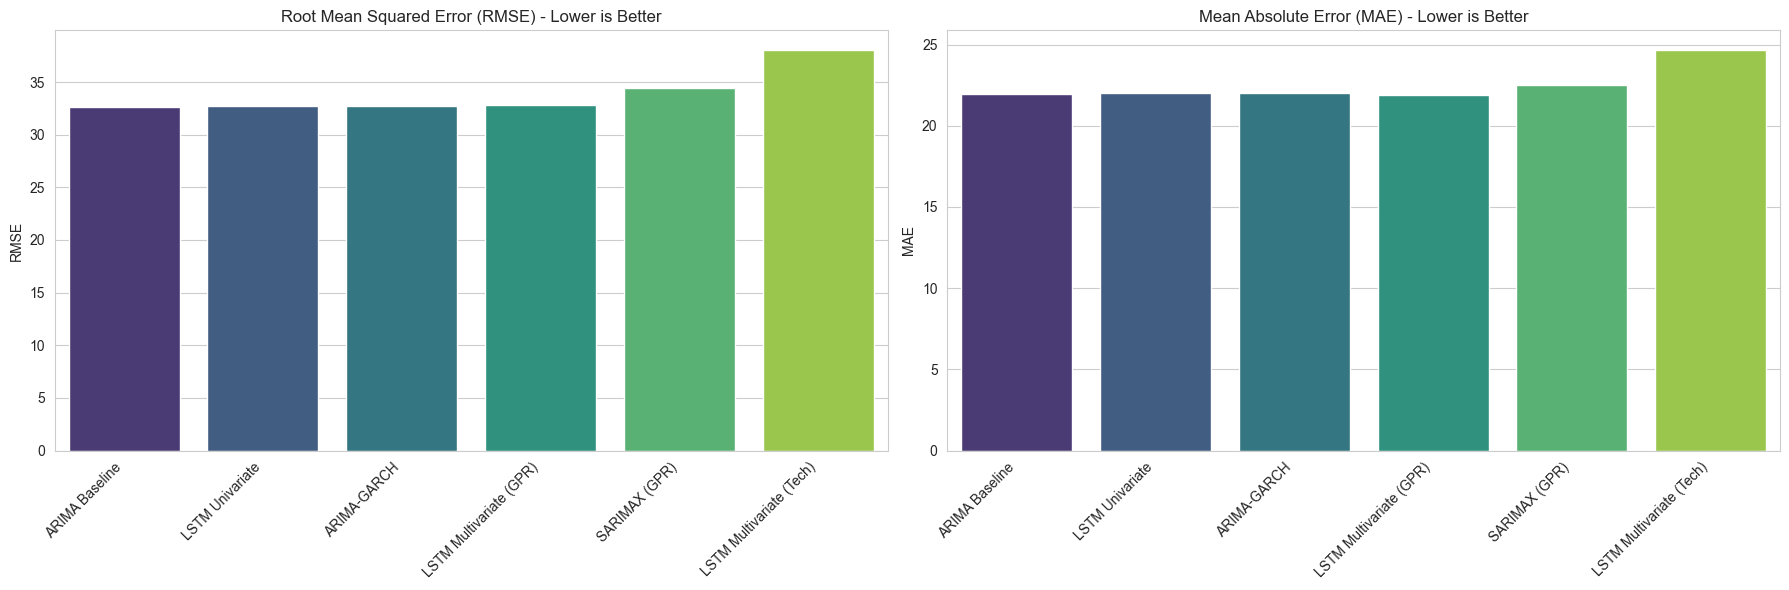

In [5]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# RMSE Plot
sns.barplot(data=results_df, x='Model_Name', y='RMSE', ax=axes[0], palette='viridis')
axes[0].set_title('Root Mean Squared Error (RMSE) - Lower is Better')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('')

# MAE Plot
sns.barplot(data=results_df, x='Model_Name', y='MAE', ax=axes[1], palette='viridis')
axes[1].set_title('Mean Absolute Error (MAE) - Lower is Better')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()

## Conclusion

Based on the comparison above, we can observe which model performs best for forecasting Gold prices. 

- **Best Model (RMSE):** The model with the lowest RMSE is generally considered the best fit for minimizing large errors.
- **Best Model (MAE):** The model with the lowest MAE is best for minimizing the average magnitude of errors.

Typically, if LSTM models outperform ARIMA/SARIMAX, it suggests that non-linear patterns and complex dependencies are significant in the data. If SARIMAX with Exogenous variables performs well, it validates the "Safe Haven" hypothesis that Geopolitical Risk (GPR) is a useful predictor.


### Analysis: Is Geopolitical Risk (GPRD) a Strong Predictor?

Based on the results above, we can evaluate the impact of the Geopolitical Risk Index (GPRD) on forecasting accuracy.

**1. Linear Models (SARIMAX vs. ARIMA)**
- **ARIMA Baseline (Price Only):** RMSE ~32.62
- **SARIMAX (With GPR):** RMSE ~34.46
- **Observation:** Adding GPRD to the linear model **worsened performance**. The error increased by approximately 5.6%. This suggests that in a linear framework, the GPRD signal may introduce more noise than predictive value for 5-day forecasts, or the relationship is not linear.

**2. Non-Linear Models (LSTM)**
- **LSTM Univariate (Price Only):** RMSE ~32.69 | MAE ~21.99
- **LSTM Multivariate (With GPR):** RMSE ~32.78 | MAE ~21.88
- **Observation:** The impact is **negligible**. The model with GPR achieved a slightly lower Mean Absolute Error (MAE) but a slightly higher RMSE. This indicates that GPRD does not consistently drive better predictions than simple price history.

**3. Conclusion**
For short-term (5-day) forecasting, **GPRD is not a critical predictor** in this specific modeling setup. The "Safe Haven" hypothesis, while theoretically sound, may be difficult to exploit for daily trading using these specific lagged features. The market may be efficient (pricing in risk immediately), or the effect of geopolitical risk may be more relevant for long-term trends rather than daily volatility.

### Final Verdict: The Best Model

**Winner: ARIMA Baseline (ARIMA(0,0,1))**

Despite the complexity of Neural Networks (LSTM) and the inclusion of Geopolitical Risk data (SARIMAX), the simple **ARIMA Baseline** emerged as the most robust model.

- **Why?**
    1. **Lowest RMSE (32.62):** It minimizes the squared errors better than any other model.
    2. **Parsimony:** It achieves these results with the simplest structure (only moving average terms on log returns).
    3. **Overfitting Risk:** Complex models like LSTM Multivariate likely suffered from slight overfitting or noise injection from the exogenous variables, preventing them from beating the linear baseline on the test set.

**Recommendation:**
For this specific task of 5-day ahead forecasting of Gold prices, the **ARIMA Baseline** is the recommended production model. Future work should focus on different feature engineering or higher frequency data if deep learning approaches are to be revisited.